# Installation des packages

In [1]:
!pip3 install openpyxl
!pip3 install linearmodels
import pandas as pd
import numpy as np
import linearmodels
from linearmodels.iv import IV2SLS
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# Importation des données

## Notes ESG : environnement

In [2]:
esg_data = pd.read_csv('ESG_E.csv')
esg_data.head()

,idEntreprise,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,...,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12,2023-01,2023-02,2023-03,2023-04
0,1,"44,375","44,08888889","44,08627778","44,08371889","44,08121118","44,07875362","44,07634522","43,7962072","44,21611639",...,"60,4206142","57,30323449","56,92830124","56,94691093","57,36955728","56,37531796","55,29196737","55,42993636","55,71251352","56,08985466"
1,2,"40,90277778","40,63055556","40,64155556","40,65233556","40,66289996","40,67325307","40,40562134","40,42112002","40,43630873",...,"73,44261856","73,25716506","72,94483216","72,55042001","73,64794086","74,07164631","74,00185758","74,20052537","74,09938254","74,07640744"
2,3,"49,51388889","49,51388889","49,51388889","49,51388889","49,51388889","50,06944444","50,05833333","50,04744444","50,31455111",...,"74,65986533","74,65596497","74,96295978","75,13466786","75,37141777","75,02208314","75,16479506","75,54714096","75,36927013","75,09739596"
3,4,"38,57638889","38,57638889","38,57638889","38,57638889","38,57638889","38,57638889","38,57638889","38,57638889","38,57638889",...,"60,55539706","60,67762245","60,51962556","60,3647886","60,49082616","62,00323186","62,37427834","62,73790388","62,81647914","62,61570511"
4,5,"37,91666667","38,20833333","35,43861111","35,50206111","36,39757544","34,77517949","34,01856479","32,16597127","32,29487407",...,"53,46184228","53,79463351","53,77218636","53,82112083","54,07152963","54,23695602","55,12772167","55,16972037","54,98915515","54,85916779"


## Score de réputation environnemental

A historical erosion factor is applied to the quantities of news articles, with recent articles weighing more than older ones. We don’t want companies scoring high to rest on their laurels and we want laggards to have a chance to improve. As a convention, each month, positive and negative articles lose 2% of their value. For example, an article published 10 years ago has lost 90% of its information value (weight)

### PFL_E

Reputation score based on forward-looking news data in the Environment dimension. The reputation score is given by the ratio between positive news and total news.

In [3]:
PFL_E = pd.read_excel('PFL_E.xlsx', engine='openpyxl')
PFL_E.head()

,idEntreprise,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,...,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12,2023-01,2023-02,2023-03,2023-04
0,1,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,81.186158,81.186158,81.186158,81.186158,81.186158,81.186158,82.956271,78.140388,79.159174,79.159174
1,2,83.333333,83.333333,83.333333,83.333333,83.333333,83.333333,83.333333,83.333333,83.333333,...,88.759955,88.759955,83.461146,83.461146,86.316169,87.240609,87.240609,85.286927,85.286927,85.390845
2,3,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,91.555642,91.555642,92.008106,92.008106,92.292810,92.781502,93.034577,93.353531,93.700120,93.760769
3,4,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,58.695016,58.695016,58.695016,58.695016,58.695016,58.695016,58.695016,58.695016,58.695016,58.695016
4,5,92.227424,92.227424,92.227424,92.227424,92.227424,92.227424,93.707863,93.707863,93.707863,...,76.934138,76.934138,77.495928,77.495928,77.865949,79.341179,79.351232,76.901246,75.316849,75.173441


### Diff_z_E

Diff_z_E represents the gap between backward-looking and forward-looking reputation scores and allows to formulate the greenwashing risk indicator.

In [4]:
Diff_z_E = pd.read_excel('diff_z_E.xlsx', engine='openpyxl')
Diff_z_E.head()

,Unnamed: 0,idEntreprise,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,...,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12,2023-01,2023-02,2023-03,2023-04
0,0,1,5.475597,5.339223,5.534291,5.639993,5.892612,5.697990,5.272556,5.014469,...,1.131895,1.693801,1.764817,1.741225,1.627804,1.833804,2.188232,1.767443,1.807961,1.662459
1,1,2,4.625725,4.544048,3.999996,3.832841,3.879504,3.749607,3.574236,3.555774,...,-0.167008,-0.170623,-0.237628,-0.226645,-0.168001,-0.157278,-0.158971,-0.230481,-0.232733,-0.232991
2,2,3,3.375933,3.344932,3.451493,3.153358,3.646911,3.324226,2.997926,2.982317,...,0.090704,0.100423,0.108410,0.071583,0.046480,0.065534,0.060592,0.018008,0.050280,0.072852
3,3,4,9.404450,9.322334,9.808397,9.402321,9.517171,9.206014,9.268901,9.222245,...,-0.723974,-0.715818,-0.718596,-0.714705,-0.711497,-0.677421,-0.666651,-0.657417,-0.653553,-0.651389
4,4,5,10.828811,10.293720,10.752097,9.931970,10.174925,9.475512,8.810946,8.685277,...,1.065296,0.948453,0.982728,0.952474,0.916959,1.016904,0.802983,0.603751,0.512227,0.487228


## Score de controverse

Final controversy score for environemental dimension

In [5]:
CON_E = pd.read_excel('CON_E.xlsx', engine='openpyxl')
CON_E

,idEntreprise,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,...,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12,2023-01,2023-02,2023-03,2023-04
0,1,0.000000,11.111111,8.888889,7.111111,5.688889,4.551111,3.640889,14.023822,11.219058,...,95.000456,90.878881,86.036438,81.975582,72.247132,74.625457,97.205522,90.921703,83.107733,80.062460
1,2,11.111111,20.000000,16.000000,12.800000,10.240000,8.192000,17.664711,14.131769,11.305415,...,33.356441,26.685153,43.570345,45.967387,47.885021,38.308016,30.646413,46.739353,37.391482,29.913186
2,3,0.000000,0.000000,0.000000,0.000000,11.111111,8.888889,7.111111,5.688889,4.551111,...,24.922552,19.938041,15.950433,12.760347,10.208277,30.388844,24.311075,19.448860,26.670199,32.447270
3,4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,21.288006,17.030405,13.624324,10.899459,8.719567,6.975654,5.580523,4.464418,3.571535,2.857228
4,5,36.111111,68.888889,91.952381,91.555556,78.165333,90.417778,85.920000,92.937543,86.077611,...,99.799505,98.728493,97.446020,96.017441,97.956816,91.698786,93.367594,99.630794,98.074889,96.408810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8594,19239,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8595,19240,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8596,19247,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8597,19251,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


## Score de communication environnemental

In [6]:
# On prend le score de comm environnemental que l'on a calculé
env_comm_score = pd.read_csv('env_comm_score_articles_forces.csv')

# Normalisation du score sde communication environnemental
env_comm_score['environmental_sentiment_score'] = ((env_comm_score['environmental_sentiment_score'] - env_comm_score['environmental_sentiment_score'].min()) / (env_comm_score['environmental_sentiment_score'].max() - env_comm_score['environmental_sentiment_score'].min())) * 2 - 1

env_comm_score

,Entreprise_Insérée_1,ISIN,environmental_sentiment_score
0,International Paper Co,US4601461035,-0.254979
1,China Development Bank Financial Leasing Co Ltd,CNE1000027C9,-0.312628
2,Southern Co,US8425871071,-0.050354
3,Sappi Ltd,ZAE000006284,0.189178
4,Johnson Controls International PLC,IE00BY7QL619,-0.154138
...,...,...,...
95,Sanofi SA,FR0000120578,-0.388458
96,Conagra Brands Inc,US2058871029,-0.319260
97,Southwest Airlines Co,US8447411088,-0.413300
98,Mitsui & Co Ltd,JP3893600001,-0.236794


# Cleaning, harmonisation et manipulation des bases de données

In [7]:
# Nb de lignes avec erreur: 1 sur 13000
covalence_id_firms = pd.read_csv('Universe_Listed_Covalence_31.07.2023_v2_updated.csv',sep=';',on_bad_lines='skip')
covalence_id_firms.head()

,Unnamed: 0,idEntreprise,Company,ISIN,GICS industry group,GICS sub-industry,Headquarters Region,Headquarters Country
0,0,1,Pfizer Inc,US7170811035,"Pharmaceuticals, Biotechnology & Life Sciences",Pharmaceuticals,Americas,United States of America
1,1,2,Merck & Co Inc,US58933Y1055,"Pharmaceuticals, Biotechnology & Life Sciences",Pharmaceuticals,Americas,United States of America
2,2,3,GSK plc,GB0009252882,Unable to resolve all requested identifiers.,Unable to resolve all requested identifiers.,Unable to resolve all requested identifiers.,Unable to resolve all requested identifiers.
3,3,4,Eli Lilly and Co,US5324571083,"Pharmaceuticals, Biotechnology & Life Sciences",Pharmaceuticals,Americas,United States of America
4,4,5,Bayer AG,DE000BAY0017,"Pharmaceuticals, Biotechnology & Life Sciences",Pharmaceuticals,Europe,Germany


In [8]:
covalence_id_firms.to_pickle('covalence_id_firms.pkl')
covalence_id_firms = pd.read_pickle('covalence_id_firms.pkl')
covalence_id_firms.head()

,Unnamed: 0,idEntreprise,Company,ISIN,GICS industry group,GICS sub-industry,Headquarters Region,Headquarters Country
0,0,1,Pfizer Inc,US7170811035,"Pharmaceuticals, Biotechnology & Life Sciences",Pharmaceuticals,Americas,United States of America
1,1,2,Merck & Co Inc,US58933Y1055,"Pharmaceuticals, Biotechnology & Life Sciences",Pharmaceuticals,Americas,United States of America
2,2,3,GSK plc,GB0009252882,Unable to resolve all requested identifiers.,Unable to resolve all requested identifiers.,Unable to resolve all requested identifiers.,Unable to resolve all requested identifiers.
3,3,4,Eli Lilly and Co,US5324571083,"Pharmaceuticals, Biotechnology & Life Sciences",Pharmaceuticals,Americas,United States of America
4,4,5,Bayer AG,DE000BAY0017,"Pharmaceuticals, Biotechnology & Life Sciences",Pharmaceuticals,Europe,Germany


In [9]:
covalence_id_firms = covalence_id_firms.drop(columns=['Unnamed: 0','GICS industry group','GICS sub-industry','Headquarters Region','Headquarters Country'], axis=1)
covalence_id_firms.head()

,idEntreprise,Company,ISIN
0,1,Pfizer Inc,US7170811035
1,2,Merck & Co Inc,US58933Y1055
2,3,GSK plc,GB0009252882
3,4,Eli Lilly and Co,US5324571083
4,5,Bayer AG,DE000BAY0017


In [10]:
# Effectuer une jointure (merge) entre df1 et df2 sur la colonne 'ISIN'
env_comm_score = pd.merge(covalence_id_firms, env_comm_score, on='ISIN', how='inner').drop(columns=['Entreprise_Insérée_1'])

# Afficher les premières lignes du DataFrame fusionné pour vérification
env_comm_score

,idEntreprise,Company,ISIN,environmental_sentiment_score
0,1,Pfizer Inc,US7170811035,-0.019093
1,4,Eli Lilly and Co,US5324571083,-0.797448
2,8,Novartis AG,CH0012005267,0.007401
3,13,Roche Holding AG,CH0012032048,-0.121570
4,22,Siemens AG,DE0007236101,-0.068981
...,...,...,...,...
95,13806,Coface SA,FR0010667147,-0.443220
96,14351,Stelco Holdings Inc,CA8585221051,-0.121833
97,16645,Hindustan Copper Ltd,INE531E01026,-0.102089
98,17097,Fawaz Abdulaziz Alhokair Company SJSC,SA000A0LB2R6,-0.297873


On ne garde que le score ESG des entreprises dont on a un score de communication environemental :

In [11]:
# Filtrer les lignes de esg_data en fonction des idEntreprise présents dans merged_df
filtered_esg_data = esg_data[esg_data['idEntreprise'].isin(env_comm_score['idEntreprise'])].reset_index(drop=True)

filtered_esg_data.head()

,idEntreprise,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,...,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12,2023-01,2023-02,2023-03,2023-04
0,1,"44,375","44,08888889","44,08627778","44,08371889","44,08121118","44,07875362","44,07634522","43,7962072","44,21611639",...,"60,4206142","57,30323449","56,92830124","56,94691093","57,36955728","56,37531796","55,29196737","55,42993636","55,71251352","56,08985466"
1,4,"38,57638889","38,57638889","38,57638889","38,57638889","38,57638889","38,57638889","38,57638889","38,57638889","38,57638889",...,"60,55539706","60,67762245","60,51962556","60,3647886","60,49082616","62,00323186","62,37427834","62,73790388","62,81647914","62,61570511"
2,8,"38,47222222","38,48611111","38,49972222","38,51306111","38,52613322","37,98338834","37,17372057","36,93580171","36,42486346",...,"66,46650424","66,25419276","65,77211159","65,2215483","65,42086593","65,62818276","65,30435909","65,81016289","65,90929594","66,00582052"
3,13,"39,13194444","39,13194444","39,13194444","39,13194444","39,13194444","39,13194444","39,13194444","39,13194444","39,13194444",...,"78,22512169","78,2768499","78,03953451","77,72177082","77,99360962","78,16028371","77,86632904","77,87692465","77,49923799","77,50476379"
4,22,"45,48611111","45,20833333","45,63055556","46,18322222","46,16928","46,01672773","46,0061154","46,41238198","46,94941212",...,"85,80737277","85,83911867","85,7484184","85,78261347","85,87164907","85,92845562","86,0027362","85,93939596","86,05822287","86,30556478"


On perds quelques données du à la fusion des tables...

In [12]:
# Filtrer les lignes de esg_data en fonction des idEntreprise présents dans merged_df
filtered_PFL_E = PFL_E[PFL_E['idEntreprise'].isin(filtered_esg_data['idEntreprise'])].reset_index(drop=True)

# Afficher les premières lignes du DataFrame filtré pour vérification
filtered_PFL_E.head()

,idEntreprise,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,...,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12,2023-01,2023-02,2023-03,2023-04
0,1,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,81.186158,81.186158,81.186158,81.186158,81.186158,81.186158,82.956271,78.140388,79.159174,79.159174
1,4,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,58.695016,58.695016,58.695016,58.695016,58.695016,58.695016,58.695016,58.695016,58.695016,58.695016
2,8,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,...,81.075432,81.075432,81.075432,81.075432,81.075432,81.585599,81.585599,81.585599,81.585599,81.585599
3,13,66.666667,66.666667,66.666667,66.666667,66.666667,66.666667,66.666667,66.666667,66.666667,...,66.228538,66.228538,66.228538,64.939967,73.405154,75.941111,75.941111,75.941111,68.578463,71.346316
4,22,96.733427,96.733427,95.287728,95.287728,95.287728,96.270945,97.085886,97.085886,97.264082,...,96.934450,96.934450,96.820940,96.873028,96.959329,96.997937,97.093658,96.902036,96.808212,96.856722


In [13]:
# Filtrer les lignes de esg_data en fonction des idEntreprise présents dans merged_df
filtered_Diff_z_E = Diff_z_E[Diff_z_E['idEntreprise'].isin(filtered_PFL_E['idEntreprise'])].reset_index(drop=True)

# Afficher les premières lignes du DataFrame filtré pour vérification
filtered_Diff_z_E.head()

,Unnamed: 0,idEntreprise,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,...,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12,2023-01,2023-02,2023-03,2023-04
0,0,1,5.475597,5.339223,5.534291,5.639993,5.892612,5.697990,5.272556,5.014469,...,1.131895,1.693801,1.764817,1.741225,1.627804,1.833804,2.188232,1.767443,1.807961,1.662459
1,3,4,9.404450,9.322334,9.808397,9.402321,9.517171,9.206014,9.268901,9.222245,...,-0.723974,-0.715818,-0.718596,-0.714705,-0.711497,-0.677421,-0.666651,-0.657417,-0.653553,-0.651389
2,5,8,-0.075484,-0.524792,-0.545910,-1.015869,-1.028567,-1.000662,-1.277811,-1.272251,...,0.761785,0.741094,0.837490,0.902655,0.819650,0.855955,0.930886,0.719419,0.676225,0.641466
3,9,13,1.135266,1.038529,0.918773,0.878360,2.412995,2.227531,2.244362,2.232484,...,-0.550850,-0.545336,-0.557770,-0.578496,-0.418510,-0.367119,-0.354638,-0.346472,-0.519011,-0.453953
4,15,22,0.362680,0.347337,0.239738,0.232189,0.198840,0.143681,0.182973,0.161359,...,-0.116250,-0.117287,-0.114136,-0.114991,-0.119788,-0.122986,-0.123353,-0.128431,-0.132453,-0.129903


In [14]:
# Filtrer les lignes de esg_data en fonction des idEntreprise présents dans merged_df
filtered_CON_E = CON_E[CON_E['idEntreprise'].isin(filtered_Diff_z_E['idEntreprise'])].reset_index(drop=True)

# Afficher les premières lignes du DataFrame filtré pour vérification
pd.reset_option('display.max_rows')
filtered_CON_E.head()

,idEntreprise,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,...,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12,2023-01,2023-02,2023-03,2023-04
0,1,0.000000,11.111111,8.888889,7.111111,5.688889,4.551111,3.640889,14.023822,11.219058,...,95.000456,90.878881,86.036438,81.975582,72.247132,74.625457,97.205522,90.921703,83.107733,80.062460
1,4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,21.288006,17.030405,13.624324,10.899459,8.719567,6.975654,5.580523,4.464418,3.571535,2.857228
2,8,36.111111,35.555556,28.444444,22.755556,18.204444,36.785778,52.799644,50.573049,53.077356,...,70.957466,62.706933,76.523889,70.342682,66.447846,67.236872,73.971066,72.086841,65.594982,54.468912
3,13,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,45.986458,36.789167,41.592903,64.557839,62.026917,64.499296,72.475005,85.723994,86.216526,84.642131
4,22,0.000000,11.111111,8.888889,7.111111,5.688889,26.773333,21.418667,17.134933,13.707947,...,90.748286,93.291756,91.128709,88.872497,81.868616,74.489958,77.291451,87.160131,92.336943,86.314251


On ne souhaite garder que les données qui sont communes dans le temps à chacune (on ne garde par le score ESG d'une entreprise en 2004, si d'autres tables comme PFL_E ne voient leur données commencer qu'en 2009)

In [15]:
# Créez un dictionnaire avec les noms des tables associés à chaque DataFrame
tables = {
    'filtered_esg_data': filtered_esg_data,
    'filtered_PFL_E': filtered_PFL_E,
    'filtered_Diff_z_E': filtered_Diff_z_E,
    'filtered_CON_E': filtered_CON_E
}

# Créez un ensemble contenant les colonnes de la première table
common_columns = set(tables['filtered_esg_data'].columns)

# Trouvez l'intersection des colonnes avec les autres tables
for table_name, table in tables.items():
    common_columns = common_columns.intersection(set(table.columns))

# Convertissez l'ensemble en une liste ordonnée de colonnes communes
common_columns = list(common_columns)

# Filtrer chaque table pour ne garder que les colonnes communes
for table_name, table in tables.items():
    # Récupérez l'ordre original des colonnes de la première table
    original_order = table.columns
    # Filtrer les colonnes communes et réorganiser selon l'ordre original
    filtered_table = table[common_columns].reindex(columns=original_order)
    # Supprimer les colonnes non communes
    tables[table_name] = filtered_table.drop(columns=set(original_order) - set(common_columns))

filtered_esg_data = tables['filtered_esg_data']
filtered_PFL_E = tables['filtered_PFL_E']
filtered_Diff_z_E = tables['filtered_Diff_z_E']
filtered_CON_E = tables['filtered_CON_E']

##### Affichage des dataframes pour vérification

In [16]:
filtered_esg_data.head()

,idEntreprise,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,...,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12,2023-01,2023-02,2023-03,2023-04
0,1,"60,86646387","61,04691044","61,22374809","60,84149342","60,59020616","60,48975545","61,20442383","60,95340015","59,02503191",...,"60,4206142","57,30323449","56,92830124","56,94691093","57,36955728","56,37531796","55,29196737","55,42993636","55,71251352","56,08985466"
1,4,"57,45505391","57,42678617","57,39908378","57,37193544","57,34533006","57,31925679","57,29370499","57,26866422","56,96634649",...,"60,55539706","60,67762245","60,51962556","60,3647886","60,49082616","62,00323186","62,37427834","62,73790388","62,81647914","62,61570511"
2,8,"55,99659692","56,29610943","56,31185391","56,88283905","56,88684894","56,89077863","56,75574083","56,76229268","56,76871349",...,"66,46650424","66,25419276","65,77211159","65,2215483","65,42086593","65,62818276","65,30435909","65,81016289","65,90929594","66,00582052"
3,13,"54,21812384","54,41570581","54,60933614","54,52131608","53,60172309","53,81163308","53,73956708","53,66894241","53,877508",...,"78,22512169","78,2768499","78,03953451","77,72177082","77,99360962","78,16028371","77,86632904","77,87692465","77,49923799","77,50476379"
4,22,"86,41489005","86,39377944","86,3793057","86,47535078","86,54310592","87,1373082","87,9656873","87,89553272","87,48831047",...,"85,80737277","85,83911867","85,7484184","85,78261347","85,87164907","85,92845562","86,0027362","85,93939596","86,05822287","86,30556478"


In [17]:
filtered_PFL_E.head()

,idEntreprise,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,...,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12,2023-01,2023-02,2023-03,2023-04
0,1,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,81.186158,81.186158,81.186158,81.186158,81.186158,81.186158,82.956271,78.140388,79.159174,79.159174
1,4,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,58.695016,58.695016,58.695016,58.695016,58.695016,58.695016,58.695016,58.695016,58.695016,58.695016
2,8,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,...,81.075432,81.075432,81.075432,81.075432,81.075432,81.585599,81.585599,81.585599,81.585599,81.585599
3,13,66.666667,66.666667,66.666667,66.666667,66.666667,66.666667,66.666667,66.666667,66.666667,...,66.228538,66.228538,66.228538,64.939967,73.405154,75.941111,75.941111,75.941111,68.578463,71.346316
4,22,96.733427,96.733427,95.287728,95.287728,95.287728,96.270945,97.085886,97.085886,97.264082,...,96.934450,96.934450,96.820940,96.873028,96.959329,96.997937,97.093658,96.902036,96.808212,96.856722


In [18]:
filtered_Diff_z_E.head()

,idEntreprise,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,...,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12,2023-01,2023-02,2023-03,2023-04
0,1,5.475597,5.339223,5.534291,5.639993,5.892612,5.697990,5.272556,5.014469,6.440140,...,1.131895,1.693801,1.764817,1.741225,1.627804,1.833804,2.188232,1.767443,1.807961,1.662459
1,4,9.404450,9.322334,9.808397,9.402321,9.517171,9.206014,9.268901,9.222245,10.491579,...,-0.723974,-0.715818,-0.718596,-0.714705,-0.711497,-0.677421,-0.666651,-0.657417,-0.653553,-0.651389
2,8,-0.075484,-0.524792,-0.545910,-1.015869,-1.028567,-1.000662,-1.277811,-1.272251,-1.253410,...,0.761785,0.741094,0.837490,0.902655,0.819650,0.855955,0.930886,0.719419,0.676225,0.641466
3,13,1.135266,1.038529,0.918773,0.878360,2.412995,2.227531,2.244362,2.232484,2.098563,...,-0.550850,-0.545336,-0.557770,-0.578496,-0.418510,-0.367119,-0.354638,-0.346472,-0.519011,-0.453953
4,22,0.362680,0.347337,0.239738,0.232189,0.198840,0.143681,0.182973,0.161359,0.202378,...,-0.116250,-0.117287,-0.114136,-0.114991,-0.119788,-0.122986,-0.123353,-0.128431,-0.132453,-0.129903


In [19]:
filtered_CON_E.head()

,idEntreprise,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,...,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12,2023-01,2023-02,2023-03,2023-04
0,1,29.837788,23.870230,19.096184,26.388059,43.332669,34.666135,27.732908,34.849215,61.082128,...,95.000456,90.878881,86.036438,81.975582,72.247132,74.625457,97.205522,90.921703,83.107733,80.062460
1,4,25.226747,20.181397,16.145118,12.916094,10.332875,8.266300,6.613040,5.290432,15.343457,...,21.288006,17.030405,13.624324,10.899459,8.719567,6.975654,5.580523,4.464418,3.571535,2.857228
2,8,17.161632,24.840417,19.872334,15.897867,12.718294,10.174635,30.361930,24.289544,19.431635,...,70.957466,62.706933,76.523889,70.342682,66.447846,67.236872,73.971066,72.086841,65.594982,54.468912
3,13,4.102707,3.282165,2.625732,2.100586,35.013802,28.011042,22.408833,17.927067,14.341653,...,45.986458,36.789167,41.592903,64.557839,62.026917,64.499296,72.475005,85.723994,86.216526,84.642131
4,22,58.023783,46.419026,49.063495,58.597066,46.877652,48.613233,65.548080,68.144919,76.395216,...,90.748286,93.291756,91.128709,88.872497,81.868616,74.489958,77.291451,87.160131,92.336943,86.314251


# Visualisation

## Score environnementale

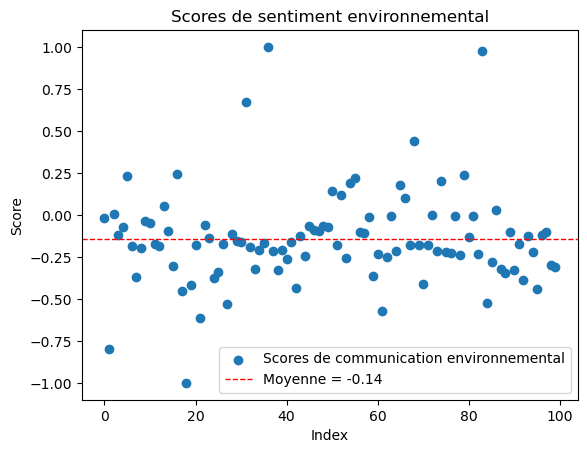

In [20]:
import matplotlib.pyplot as plt

# Données à tracer
x = range(100)
y = env_comm_score['environmental_sentiment_score']

# Tracer le nuage de points
plt.scatter(x, y, label='Scores de communication environnemental')

# Calculer et tracer la moyenne
mean_environmental_sentiment_score = env_comm_score['environmental_sentiment_score'].mean()
plt.axhline(mean_environmental_sentiment_score, color='red', linestyle='dashed', linewidth=1, label=f'Moyenne = {mean_environmental_sentiment_score:.2f}')

# Ajouter des titres et des labels
plt.title('Scores de sentiment environnemental')
plt.xlabel('Index')
plt.ylabel('Score')
plt.legend()

# Afficher le graphique
plt.show()

## Score ESG

In [21]:
def visu_cours_esg(num_entreprise,):

    visu_esg_company = summarized_data['Company'].iloc[num_entreprise]
    visu_esg_data = summarized_data.drop(columns=['idEntreprise','Company','ISIN','environmental_sentiment_score']).iloc[num_entreprise]

    # Convertir les données en float et supprimer l'index 'idEntreprise'
    visu_esg_data = visu_esg_data.str.replace(',', '.').astype(float)

    # Créer le graphe
    plt.figure(figsize=(12, 6))
    plt.plot(visu_esg_data.index[1:], visu_esg_data.values[1:], marker='o', linestyle='-')

    # Ajuster l'affichage des ticks de l'axe des abscisses pour n'afficher qu'une date sur deux
    plt.xticks(rotation=45, ticks=visu_esg_data.index[1::12])  # Affiche une date sur deux

    title = "Cours du critère ESG de l'entreprise " + visu_esg_company
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Note ESG')
    plt.grid(True)
    plt.tight_layout()  # Ajuste automatiquement le placement des labels pour éviter le chevauchement
    plt.show()

# Manipulation des données

## Construction de la variable de communication environnemental dans le temps 

On a des données de score de communication environnemental pour une période (en Décembre 2023), en revanche, on a besoin de données de panels, ils nous faut donc le score de communication environnemental de janvier 2002 à Avril 2023. 

- Aléa + variation du critère ESG : On peut faire l'hypothèse que les agences de cotations font bien leur boulot. Ainsi, on analyse leur séries temporelles, dès lors que le score ESG attribué à une entreprise diminue, ou varie négativement en dessous d'un seuil, alors l'entreprise cherche à communiquer de manière verte.
-  Aléa pur : on peut considérer que le score environementale d'une entreprise est complètement aléatoire, on part du score environemental que l'on a, et on ajoute un epsilon à chaque période

#### Fonction pour visualiser le score de communication environemental dans le temps, une fois qu'on a ajouté l'aléa

In [22]:
def visu_cours_env_comm_score(num_entreprise, df):

    visu_company = df['Company'].iloc[num_entreprise]
    # Liste des colonnes à supprimer
    colonnes_a_supprimer = ['idEntreprise', 'Company', 'ISIN', 'env_sentiment_score_2023-12', 'environmental_sentiment_score']

    # Vérifie la présence de chaque colonne avant de la supprimer
    for colonne in colonnes_a_supprimer:
        if colonne in df.columns:
            df.drop(columns=[colonne], inplace=True)

    # Sélectionne la ligne spécifiée par num_entreprise
    visu_data = df.iloc[num_entreprise]

    # Créer le graphe
    plt.figure(figsize=(12, 6))
    plt.plot(visu_data.index[1:], visu_data.values[1:], marker='o', linestyle='-')

    # Ajuster l'affichage des ticks de l'axe des abscisses pour n'afficher qu'une date sur deux
    plt.xticks(rotation=90, ticks=visu_data.index[1::12])  # Affiche une date sur deux

    title = "Cours du score de communication environemental de l'entreprise " + visu_company
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Score de communication environemental')
    plt.grid(True)
    plt.tight_layout()  # Ajuste automatiquement le placement des labels pour éviter le chevauchement
    plt.show()

### Ajout aléa pur dans le score environnemental

#### Aléa = Uniforme sur [-0.2,0.2]

In [23]:
# Liste des mois de janvier 2002 à avril 2023
months = pd.date_range(start='2002-01-01', end='2023-04-01', freq='MS')

# Liste pour stocker les nouvelles colonnes
new_columns = []

# Création des colonnes pour chaque mois avec de l'aléa
for month in months:
    col_name = f"env_sentiment_score_{month.strftime('%Y-%m')}"
    
    # Calcul du score avec ajout d'aléa
    new_col = env_comm_score['environmental_sentiment_score'] + np.random.uniform(-0.2, 0.2)
    
    # Ajuster les valeurs pour s'assurer qu'elles restent entre -1 et 1
    new_col = np.clip(new_col, -1, 1)
    
    new_col.rename(col_name, inplace=True)
    new_columns.append(new_col)

# Concaténation des nouvelles colonnes au DataFrame original
env_comm_score_extended_unif  = pd.concat([env_comm_score] + new_columns, axis=1)
env_comm_score_extended_unif.rename(columns={'environmental_sentiment_score': 'env_sentiment_score_2023-12'}, inplace=True)

# Affichage du DataFrame
env_comm_score_extended_unif.head()


,idEntreprise,Company,ISIN,env_sentiment_score_2023-12,env_sentiment_score_2002-01,env_sentiment_score_2002-02,env_sentiment_score_2002-03,env_sentiment_score_2002-04,env_sentiment_score_2002-05,env_sentiment_score_2002-06,...,env_sentiment_score_2022-07,env_sentiment_score_2022-08,env_sentiment_score_2022-09,env_sentiment_score_2022-10,env_sentiment_score_2022-11,env_sentiment_score_2022-12,env_sentiment_score_2023-01,env_sentiment_score_2023-02,env_sentiment_score_2023-03,env_sentiment_score_2023-04
0,1,Pfizer Inc,US7170811035,-0.019093,0.139798,0.179436,-0.196234,0.132184,-0.051144,0.123495,...,-0.004068,-0.141816,0.018721,-0.180431,0.011787,0.174544,-0.115052,0.074474,-0.206938,-0.173216
1,4,Eli Lilly and Co,US5324571083,-0.797448,-0.638557,-0.598918,-0.974588,-0.646170,-0.829499,-0.654860,...,-0.782423,-0.920170,-0.759633,-0.958785,-0.766567,-0.603811,-0.893407,-0.703881,-0.985292,-0.951571
2,8,Novartis AG,CH0012005267,0.007401,0.166292,0.205930,-0.169740,0.158678,-0.024650,0.149989,...,0.022426,-0.115322,0.045215,-0.153937,0.038282,0.201038,-0.088558,0.100968,-0.180444,-0.146722
3,13,Roche Holding AG,CH0012032048,-0.121570,0.037321,0.076960,-0.298710,0.029708,-0.153621,0.021018,...,-0.106545,-0.244292,-0.083755,-0.282907,-0.090689,0.072067,-0.217529,-0.028003,-0.309414,-0.275693
4,22,Siemens AG,DE0007236101,-0.068981,0.089910,0.129549,-0.246121,0.082297,-0.101031,0.073608,...,-0.053955,-0.191703,-0.031166,-0.230318,-0.038100,0.124657,-0.164939,0.024586,-0.256825,-0.223103


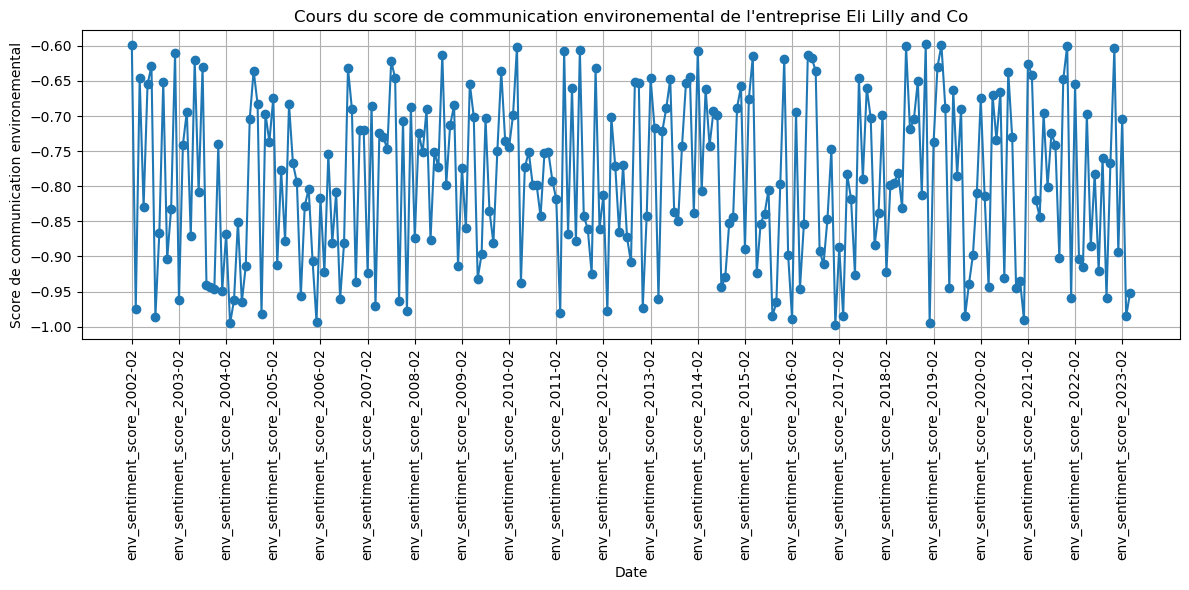

In [24]:
visu_cours_env_comm_score(1, env_comm_score_extended_unif)

#### Aléa = Normal (0 ; 0.5)

In [25]:
# Liste pour stocker les nouvelles colonnes
new_columns = []

# Création des colonnes pour chaque mois avec de l'aléa
for month in months:
    col_name = f"env_sentiment_score_{month.strftime('%Y-%m')}"
    
    # Calcul du score avec ajout d'aléa
    new_col = env_comm_score['environmental_sentiment_score'] + np.random.normal(0, 0.5)
    
    # Ajuster les valeurs pour s'assurer qu'elles restent entre -1 et 1
    new_col = np.clip(new_col, -1, 1)
    
    new_col.rename(col_name, inplace=True)
    new_columns.append(new_col)

# Concaténation des nouvelles colonnes au DataFrame original
env_comm_score_extended_normal  = pd.concat([env_comm_score] + new_columns, axis=1)
env_comm_score_extended_normal.rename(columns={'environmental_sentiment_score': 'env_sentiment_score_2023-12'}, inplace=True)

# Affichage du DataFrame
env_comm_score_extended_normal.head()

,idEntreprise,Company,ISIN,env_sentiment_score_2023-12,env_sentiment_score_2002-01,env_sentiment_score_2002-02,env_sentiment_score_2002-03,env_sentiment_score_2002-04,env_sentiment_score_2002-05,env_sentiment_score_2002-06,...,env_sentiment_score_2022-07,env_sentiment_score_2022-08,env_sentiment_score_2022-09,env_sentiment_score_2022-10,env_sentiment_score_2022-11,env_sentiment_score_2022-12,env_sentiment_score_2023-01,env_sentiment_score_2023-02,env_sentiment_score_2023-03,env_sentiment_score_2023-04
0,1,Pfizer Inc,US7170811035,-0.019093,0.204886,0.317704,-0.327520,0.615405,0.257837,-0.722169,...,-0.475204,-0.603231,0.852124,0.033906,-0.936101,-0.127512,-0.190068,-0.452935,0.652807,-0.945654
1,4,Eli Lilly and Co,US5324571083,-0.797448,-0.573469,-0.460650,-1.000000,-0.162949,-0.520517,-1.000000,...,-1.000000,-1.000000,0.073770,-0.744448,-1.000000,-0.905867,-0.968422,-1.000000,-0.125548,-1.000000
2,8,Novartis AG,CH0012005267,0.007401,0.231380,0.344198,-0.301026,0.641899,0.284331,-0.695675,...,-0.448710,-0.576737,0.878618,0.060400,-0.909607,-0.101018,-0.163574,-0.426441,0.679301,-0.919160
3,13,Roche Holding AG,CH0012032048,-0.121570,0.102409,0.215228,-0.429997,0.512929,0.155361,-0.824645,...,-0.577681,-0.705708,0.749648,-0.068570,-1.000000,-0.229989,-0.292544,-0.555411,0.550330,-1.000000
4,22,Siemens AG,DE0007236101,-0.068981,0.154999,0.267817,-0.377408,0.565518,0.207950,-0.772056,...,-0.525091,-0.653118,0.802237,-0.015981,-0.985988,-0.177399,-0.239955,-0.502822,0.602920,-0.995541


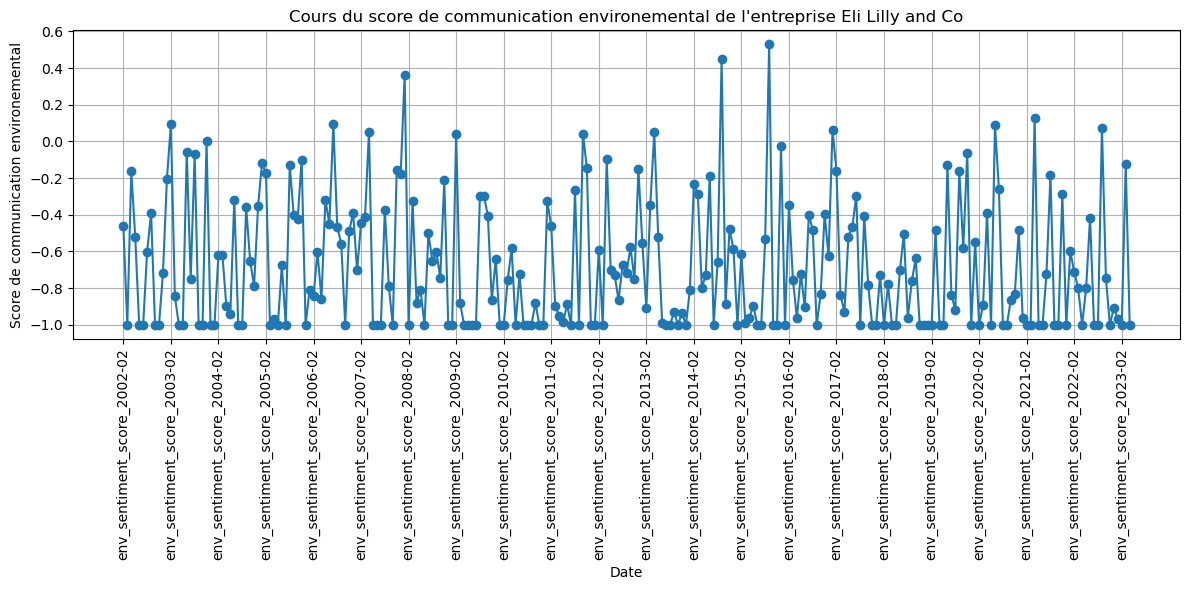

In [26]:
visu_cours_env_comm_score(1, env_comm_score_extended_normal)

### Aléa + critère ESG

On regarde les variations des score de réputation , en y ajoutant un bruit : Normale ( 0 , 0.01 )

In [27]:
# Sélectionner les colonnes sur lesquelles appliquer la fonction de variation
cols_to_change = PFL_E.columns.difference(['idEntreprise'])

# Remplacer les virgules par des points dans les colonnes sélectionnées
PFL_E[cols_to_change] = PFL_E[cols_to_change].replace(',', '.', regex=True)

# Convertir les colonnes sélectionnées en type numérique
PFL_E[cols_to_change] = PFL_E[cols_to_change].apply(pd.to_numeric)

# Calculer la variation mensuelle pour les colonnes sélectionnées
variation_mensuelle = PFL_E[cols_to_change].diff(axis=1) / PFL_E[cols_to_change].shift(axis=1)

# Remplacer les valeurs infinies par NaN
variation_mensuelle.replace([np.inf, -np.inf], np.nan, inplace=True)

# Ajouter du bruit aux variations mensuelles
noise = np.random.normal(loc=0, scale=0.01, size=variation_mensuelle.shape)
var_bruit_PFL_E_data = variation_mensuelle + noise

# Concaténer la colonne 'idEntreprises' avec les variations calculées
var_bruit_PFL_E_data = pd.concat([PFL_E['idEntreprise'], var_bruit_PFL_E_data], axis=1)

# Afficher le résultat
var_bruit_PFL_E_data.head()


,idEntreprise,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,...,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12,2023-01,2023-02,2023-03,2023-04
0,1,NaN,0.012094,-0.008093,-0.012668,0.011008,0.003772,-0.011946,0.007709,-0.015381,...,0.009606,0.003750,0.009164,-0.012403,-0.005126,-0.000896,0.013247,-0.068479,0.017768,-0.003385
1,2,NaN,-0.005291,-0.003395,-0.011009,0.005131,-0.003657,0.007315,0.001511,-0.007773,...,-0.007468,0.006893,-0.047701,-0.019362,0.023684,-0.012093,-0.005673,-0.024637,-0.001325,0.002948
2,3,NaN,0.004941,0.008681,-0.001589,-0.008180,-0.001972,0.025444,-0.002046,0.006491,...,0.006350,-0.002283,0.009926,0.001167,-0.009321,0.017201,-0.014684,0.010164,0.010383,0.006548
3,4,NaN,0.003516,-0.001744,-0.003873,0.013235,0.014492,0.015697,-0.010476,0.007368,...,-0.007175,-0.007079,0.010061,-0.003118,-0.023181,-0.003850,-0.000921,0.013191,0.005571,-0.008044
4,5,NaN,-0.004669,0.018219,-0.002287,-0.014449,0.007266,0.037238,-0.012240,-0.000655,...,0.003953,-0.016951,0.007346,-0.005874,0.010555,0.019785,0.004410,-0.035040,-0.016031,0.013830


Si on suppose qu'une entreprise communique de manière verte, et qu'il faut un certain nombre de mois (qu'on nottera h) pour que le score de réputation soit impacté par ces communications, on décale les colonnes de h 

In [28]:
h = 2

var_bruit_PFL_E_data = var_bruit_PFL_E_data[cols_to_change].shift(h, axis=1)

# Générer des valeurs aléatoires pour remplacer les NaN
random_values = np.random.rand(*var_bruit_PFL_E_data.shape)

# Remplacer les NaN par des valeurs aléatoires
var_bruit_PFL_E_data_filled = var_bruit_PFL_E_data.mask(var_bruit_PFL_E_data.isnull(), random_values)

# Afficher les premières lignes du DataFrame avec valeurs aléatoires
var_bruit_PFL_E_data_filled.head()

,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,...,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12,2023-01,2023-02,2023-03,2023-04
0,0.100901,0.880878,0.892556,0.012094,-0.008093,-0.012668,0.011008,0.003772,-0.011946,0.007709,...,-0.000300,0.017830,0.009606,0.003750,0.009164,-0.012403,-0.005126,-0.000896,0.013247,-0.068479
1,0.291687,0.379056,0.975639,-0.005291,-0.003395,-0.011009,0.005131,-0.003657,0.007315,0.001511,...,0.062298,0.002703,-0.007468,0.006893,-0.047701,-0.019362,0.023684,-0.012093,-0.005673,-0.024637
2,0.843280,0.938326,0.553125,0.004941,0.008681,-0.001589,-0.008180,-0.001972,0.025444,-0.002046,...,0.003534,0.010015,0.006350,-0.002283,0.009926,0.001167,-0.009321,0.017201,-0.014684,0.010164
3,0.318098,0.851917,0.538887,0.003516,-0.001744,-0.003873,0.013235,0.014492,0.015697,-0.010476,...,0.005698,0.098682,-0.007175,-0.007079,0.010061,-0.003118,-0.023181,-0.003850,-0.000921,0.013191
4,0.175381,0.879895,0.866697,-0.004669,0.018219,-0.002287,-0.014449,0.007266,0.037238,-0.012240,...,0.016338,-0.000773,0.003953,-0.016951,0.007346,-0.005874,0.010555,0.019785,0.004410,-0.035040


In [29]:
# Sélectionner la valeur finale de 2023-04 pour chaque entreprise
valeur_finale_2023_04 = env_comm_score.loc[:, ['idEntreprise', 'environmental_sentiment_score']]

# Initialiser un DataFrame pour stocker les valeurs initiales et finales
valeurs_initiales_finales = valeur_finale_2023_04.copy()

# Liste pour stocker les nouvelles colonnes
new_columns = []

# Parcourir les colonnes de var_bruit_shift_esg_data_filled en sens inverse
for col in reversed(var_bruit_PFL_E_data_filled.columns):
    # Calculer les valeurs initiales à partir des valeurs finales et des taux de variation
    new_col = valeurs_initiales_finales['environmental_sentiment_score'] / (1 + var_bruit_PFL_E_data_filled[col])
    new_col.name = col  # Nommer la nouvelle colonne
    new_columns.insert(0,new_col)

# Concaténer les nouvelles colonnes au DataFrame existant
valeurs_initiales_finales = pd.concat([valeurs_initiales_finales] + new_columns, axis=1)
env_comm_score_extended_PFL_E = pd.merge(env_comm_score, valeurs_initiales_finales, on=['idEntreprise', 'environmental_sentiment_score'], how='inner')

# Afficher les valeurs initiales et finales
env_comm_score_extended_PFL_E

,idEntreprise,Company,ISIN,environmental_sentiment_score,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,...,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12,2023-01,2023-02,2023-03,2023-04
0,1,Pfizer Inc,US7170811035,-0.019093,-0.017343,-0.010151,-0.010089,-0.018865,-0.019249,-0.019338,...,-0.019099,-0.018759,-0.018912,-0.019022,-0.018920,-0.019333,-0.019192,-0.019111,-0.018844,-0.020497
1,4,Eli Lilly and Co,US5324571083,-0.797448,-0.617369,-0.578256,-0.403640,-0.801690,-0.800164,-0.806325,...,-0.750682,-0.795298,-0.803448,-0.791989,-0.837392,-0.813193,-0.778998,-0.807209,-0.801997,-0.817591
2,8,Novartis AG,CH0012005267,0.007401,0.004015,0.003818,0.004765,0.007364,0.007337,0.007412,...,0.007375,0.007327,0.007354,0.007418,0.007328,0.007392,0.007470,0.007275,0.007511,0.007326
3,13,Roche Holding AG,CH0012032048,-0.121570,-0.092231,-0.065645,-0.078998,-0.121144,-0.121782,-0.122042,...,-0.120881,-0.110651,-0.122448,-0.122436,-0.120359,-0.121950,-0.124455,-0.122040,-0.121682,-0.119987
4,22,Siemens AG,DE0007236101,-0.068981,-0.058688,-0.036694,-0.036953,-0.069304,-0.067746,-0.069139,...,-0.067872,-0.069034,-0.068709,-0.070170,-0.068477,-0.069388,-0.068260,-0.067642,-0.068678,-0.071485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,13806,Coface SA,FR0010667147,-0.443220,-0.258722,-0.226724,-0.410177,-0.439798,-0.440805,-0.443535,...,-0.442017,-0.439733,-0.442239,-0.440874,-0.447901,-0.438509,-0.442173,-0.446472,-0.444192,-0.439482
96,14351,Stelco Holdings Inc,CA8585221051,-0.121833,-0.079581,-0.071869,-0.104927,-0.120802,-0.121474,-0.096508,...,-0.120404,-0.122234,-0.123787,-0.122573,-0.121848,-0.120504,-0.122895,-0.122596,-0.123753,-0.121823
97,16645,Hindustan Copper Ltd,INE531E01026,-0.102089,-0.096338,-0.061505,-0.051401,-0.103770,-0.100685,-0.101216,...,-0.100637,-0.101136,-0.102212,-0.100237,-0.100741,-0.104185,-0.102279,-0.105706,-0.100791,-0.102425
98,17097,Fawaz Abdulaziz Alhokair Company SJSC,SA000A0LB2R6,-0.297873,-0.161520,-0.177128,-0.188777,-0.294626,-0.299043,-0.294056,...,-0.292280,-0.297848,-0.298780,-0.302455,-0.294671,-0.297946,-0.296212,-0.298276,-0.303419,-0.294287


## Construction du panel

In [30]:
env_comm_score_extended_PFL_E = env_comm_score_extended_PFL_E.drop(columns=['Company','ISIN','environmental_sentiment_score'])
env_comm_score_extended_PFL_E

,idEntreprise,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,...,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12,2023-01,2023-02,2023-03,2023-04
0,1,-0.017343,-0.010151,-0.010089,-0.018865,-0.019249,-0.019338,-0.018886,-0.019022,-0.019324,...,-0.019099,-0.018759,-0.018912,-0.019022,-0.018920,-0.019333,-0.019192,-0.019111,-0.018844,-0.020497
1,4,-0.617369,-0.578256,-0.403640,-0.801690,-0.800164,-0.806325,-0.793377,-0.800375,-0.791657,...,-0.750682,-0.795298,-0.803448,-0.791989,-0.837392,-0.813193,-0.778998,-0.807209,-0.801997,-0.817591
2,8,0.004015,0.003818,0.004765,0.007364,0.007337,0.007412,0.007462,0.007415,0.007217,...,0.007375,0.007327,0.007354,0.007418,0.007328,0.007392,0.007470,0.007275,0.007511,0.007326
3,13,-0.092231,-0.065645,-0.078998,-0.121144,-0.121782,-0.122042,-0.119982,-0.119833,-0.119691,...,-0.120881,-0.110651,-0.122448,-0.122436,-0.120359,-0.121950,-0.124455,-0.122040,-0.121682,-0.119987
4,22,-0.058688,-0.036694,-0.036953,-0.069304,-0.067746,-0.069139,-0.069992,-0.068483,-0.066504,...,-0.067872,-0.069034,-0.068709,-0.070170,-0.068477,-0.069388,-0.068260,-0.067642,-0.068678,-0.071485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,13806,-0.258722,-0.226724,-0.410177,-0.439798,-0.440805,-0.443535,-0.444536,-0.442549,-0.444122,...,-0.442017,-0.439733,-0.442239,-0.440874,-0.447901,-0.438509,-0.442173,-0.446472,-0.444192,-0.439482
96,14351,-0.079581,-0.071869,-0.104927,-0.120802,-0.121474,-0.096508,-0.122136,-0.121613,-0.120894,...,-0.120404,-0.122234,-0.123787,-0.122573,-0.121848,-0.120504,-0.122895,-0.122596,-0.123753,-0.121823
97,16645,-0.096338,-0.061505,-0.051401,-0.103770,-0.100685,-0.101216,-0.101968,-0.102015,-0.103626,...,-0.100637,-0.101136,-0.102212,-0.100237,-0.100741,-0.104185,-0.102279,-0.105706,-0.100791,-0.102425
98,17097,-0.161520,-0.177128,-0.188777,-0.294626,-0.299043,-0.294056,-0.297666,-0.293873,-0.300653,...,-0.292280,-0.297848,-0.298780,-0.302455,-0.294671,-0.297946,-0.296212,-0.298276,-0.303419,-0.294287


In [31]:
# Fusionner les tables sur la colonne 'idEntreprise'
merged_table = env_comm_score_extended_PFL_E.merge(filtered_CON_E[['idEntreprise']], on='idEntreprise', how='inner')

# Sélectionner les lignes de table_1 qui ont été fusionnées avec succès avec table_2
filtered_env_comm_score_extended_PFL_E = merged_table[env_comm_score_extended_PFL_E.columns]

# Afficher le résultat
filtered_env_comm_score_extended_PFL_E


,idEntreprise,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,...,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12,2023-01,2023-02,2023-03,2023-04
0,1,-0.017343,-0.010151,-0.010089,-0.018865,-0.019249,-0.019338,-0.018886,-0.019022,-0.019324,...,-0.019099,-0.018759,-0.018912,-0.019022,-0.018920,-0.019333,-0.019192,-0.019111,-0.018844,-0.020497
1,4,-0.617369,-0.578256,-0.403640,-0.801690,-0.800164,-0.806325,-0.793377,-0.800375,-0.791657,...,-0.750682,-0.795298,-0.803448,-0.791989,-0.837392,-0.813193,-0.778998,-0.807209,-0.801997,-0.817591
2,8,0.004015,0.003818,0.004765,0.007364,0.007337,0.007412,0.007462,0.007415,0.007217,...,0.007375,0.007327,0.007354,0.007418,0.007328,0.007392,0.007470,0.007275,0.007511,0.007326
3,13,-0.092231,-0.065645,-0.078998,-0.121144,-0.121782,-0.122042,-0.119982,-0.119833,-0.119691,...,-0.120881,-0.110651,-0.122448,-0.122436,-0.120359,-0.121950,-0.124455,-0.122040,-0.121682,-0.119987
4,22,-0.058688,-0.036694,-0.036953,-0.069304,-0.067746,-0.069139,-0.069992,-0.068483,-0.066504,...,-0.067872,-0.069034,-0.068709,-0.070170,-0.068477,-0.069388,-0.068260,-0.067642,-0.068678,-0.071485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,13806,-0.258722,-0.226724,-0.410177,-0.439798,-0.440805,-0.443535,-0.444536,-0.442549,-0.444122,...,-0.442017,-0.439733,-0.442239,-0.440874,-0.447901,-0.438509,-0.442173,-0.446472,-0.444192,-0.439482
96,14351,-0.079581,-0.071869,-0.104927,-0.120802,-0.121474,-0.096508,-0.122136,-0.121613,-0.120894,...,-0.120404,-0.122234,-0.123787,-0.122573,-0.121848,-0.120504,-0.122895,-0.122596,-0.123753,-0.121823
97,16645,-0.096338,-0.061505,-0.051401,-0.103770,-0.100685,-0.101216,-0.101968,-0.102015,-0.103626,...,-0.100637,-0.101136,-0.102212,-0.100237,-0.100741,-0.104185,-0.102279,-0.105706,-0.100791,-0.102425
98,17097,-0.161520,-0.177128,-0.188777,-0.294626,-0.299043,-0.294056,-0.297666,-0.293873,-0.300653,...,-0.292280,-0.297848,-0.298780,-0.302455,-0.294671,-0.297946,-0.296212,-0.298276,-0.303419,-0.294287


In [32]:
pd.reset_option('display.max_rows', None)
pd.reset_option('display.max_columns', None)

In [33]:
id_entreprises = []
for id_entreprise in filtered_env_comm_score_extended_PFL_E['idEntreprise'].unique():
    id_entreprises += [id_entreprise] * len(filtered_env_comm_score_extended_PFL_E.columns[1:])

# Créer une DataFrame à partir de la liste id_entreprises
id_entreprises_df = pd.DataFrame({'idEntreprise': id_entreprises})

In [34]:
# Transposer la partie de la DataFrame
df1 = filtered_env_comm_score_extended_PFL_E.iloc[:, 1:].T

# Concaténer les colonnes transposées en une seule colonne
df_1 = pd.concat([df1[col] for col in df1.columns])
df_1 = df_1.to_frame()
df_1 = df_1.reset_index()
df_1.rename(columns={'index': 'Date'}, inplace=True)
df_1.rename(columns={0: 'score_comm'}, inplace=True)

df_1['Date'] = df_1['Date'].apply(str)

# Concaténer les deux DataFrames
new_dataframe_1 = pd.concat([id_entreprises_df, df_1], axis=1)

# Afficher les premières lignes du DataFrame résultant
new_dataframe_1.head()

,idEntreprise,Date,score_comm
0,1,2009-01,-0.017343
1,1,2009-02,-0.010151
2,1,2009-03,-0.010089
3,1,2009-04,-0.018865
4,1,2009-05,-0.019249


In [35]:
# Transposer la partie de la DataFrame
df2 = filtered_esg_data.iloc[:, 1:].T

# Concaténer les colonnes transposées en une seule colonne
df_2 = pd.concat([df2[col] for col in df2.columns])
df_2 = df_2.to_frame()
df_2 = df_2.reset_index()
df_2.rename(columns={'index': 'Date'}, inplace=True)
df_2.rename(columns={0: 'ESG'}, inplace=True)

df_2['Date'] = df_2['Date'].apply(str)

# Concaténer les deux DataFrames
new_dataframe_2 = pd.concat([id_entreprises_df, df_2], axis=1)

# Afficher les premières lignes du DataFrame résultant
new_dataframe_2.head()

,idEntreprise,Date,ESG
0,1,2009-01,"60,86646387"
1,1,2009-02,"61,04691044"
2,1,2009-03,"61,22374809"
3,1,2009-04,"60,84149342"
4,1,2009-05,"60,59020616"


In [36]:
# Transposer la partie de la DataFrame
df3 = filtered_PFL_E.iloc[:, 1:].T

# Concaténer les colonnes transposées en une seule colonne
df_3 = pd.concat([df3[col] for col in df3.columns])
df_3 = df_3.to_frame()
df_3 = df_3.reset_index()
df_3.rename(columns={'index': 'Date'}, inplace=True)
df_3.rename(columns={0: 'PFL'}, inplace=True)

df_3['Date'] = df_3['Date'].apply(str)

# Concaténer les deux DataFrames
new_dataframe_3 = pd.concat([id_entreprises_df, df_3], axis=1)

# Afficher les premières lignes du DataFrame résultant
new_dataframe_3.head()

,idEntreprise,Date,PFL
0,1,2009-01,100.0
1,1,2009-02,100.0
2,1,2009-03,100.0
3,1,2009-04,100.0
4,1,2009-05,100.0


In [37]:
# Transposer la partie de la DataFrame
df4 = filtered_Diff_z_E.iloc[:, 1:].T

# Concaténer les colonnes transposées en une seule colonne
df_4 = pd.concat([df4[col] for col in df4.columns])
df_4 = df_4.to_frame()
df_4 = df_4.reset_index()
df_4.rename(columns={'index': 'Date'}, inplace=True)
df_4.rename(columns={0: 'Diff_z'}, inplace=True)

df_4['Date'] = df_4['Date'].apply(str)

# Concaténer les deux DataFrames
new_dataframe_4 = pd.concat([id_entreprises_df, df_4], axis=1)

# Afficher les premières lignes du DataFrame résultant
new_dataframe_4.head()

,idEntreprise,Date,Diff_z
0,1,2009-01,5.475597
1,1,2009-02,5.339223
2,1,2009-03,5.534291
3,1,2009-04,5.639993
4,1,2009-05,5.892612


In [38]:
# Transposer la partie de la DataFrame
df5 = filtered_CON_E.iloc[:, 1:].T

# Concaténer les colonnes transposées en une seule colonne
df_5 = pd.concat([df5[col] for col in df5.columns])
df_5 = df_5.to_frame()
df_5 = df_5.reset_index()
df_5.rename(columns={'index': 'Date'}, inplace=True)
df_5.rename(columns={0: 'Controverse'}, inplace=True)

df_5['Date'] = df_5['Date'].apply(str)

# Concaténer les deux DataFrames
new_dataframe_5 = pd.concat([id_entreprises_df, df_5], axis=1)

# Afficher les premières lignes du DataFrame résultant
new_dataframe_5.head()

,idEntreprise,Date,Controverse
0,1,2009-01,29.837788
1,1,2009-02,23.870230
2,1,2009-03,19.096184
3,1,2009-04,26.388059
4,1,2009-05,43.332669


In [39]:
new_dataframe_final = pd.merge(new_dataframe_1, new_dataframe_2, on=['idEntreprise','Date'])
new_dataframe_final = pd.merge(new_dataframe_final, new_dataframe_3, on=['idEntreprise','Date'])
new_dataframe_final = pd.merge(new_dataframe_final, new_dataframe_4, on=['idEntreprise','Date'])
new_dataframe_final = pd.merge(new_dataframe_final, new_dataframe_5, on=['idEntreprise','Date'])
new_dataframe_final

,idEntreprise,Date,score_comm,ESG,PFL,Diff_z,Controverse
0,1,2009-01,-0.017343,"60,86646387",100.000000,5.475597,29.837788
1,1,2009-02,-0.010151,"61,04691044",100.000000,5.339223,23.870230
2,1,2009-03,-0.010089,"61,22374809",100.000000,5.534291,19.096184
3,1,2009-04,-0.018865,"60,84149342",100.000000,5.639993,26.388059
4,1,2009-05,-0.019249,"60,59020616",100.000000,5.892612,43.332669
...,...,...,...,...,...,...,...
17195,18386,2022-12,-0.312507,"49,68058979",99.219927,2.391562,0.278300
17196,18386,2023-01,-0.313380,"49,6480891",99.219927,2.386211,0.222640
17197,18386,2023-02,-0.311894,"49,61623843",99.219927,2.347607,0.178112
17198,18386,2023-03,-0.311276,"49,58502477",99.219927,2.344902,0.142490


In [40]:
industry_data = pd.read_csv('Universe_Listed_Covalence_31.07.2023_v2_updated.csv', skiprows=[6325], delimiter=';')

# Fusionner les dataframes sur la colonne 'idEntreprise'
merged_df = pd.merge(new_dataframe_final, industry_data[['idEntreprise', 'GICS industry group', 'GICS sub-industry']], on='idEntreprise')

# Filtrer les lignes où les colonnes ne contiennent pas le texte spécifié
filtered_df = merged_df[(merged_df['GICS industry group'] != 'Unable to resolve all requested identifiers.') & 
                        (merged_df['GICS sub-industry'] != 'Unable to resolve all requested identifiers.')]

filtered_df

,idEntreprise,Date,score_comm,ESG,PFL,Diff_z,Controverse,GICS industry group,GICS sub-industry
0,1,2009-01,-0.017343,"60,86646387",100.000000,5.475597,29.837788,"Pharmaceuticals, Biotechnology & Life Sciences",Pharmaceuticals
1,1,2009-02,-0.010151,"61,04691044",100.000000,5.339223,23.870230,"Pharmaceuticals, Biotechnology & Life Sciences",Pharmaceuticals
2,1,2009-03,-0.010089,"61,22374809",100.000000,5.534291,19.096184,"Pharmaceuticals, Biotechnology & Life Sciences",Pharmaceuticals
3,1,2009-04,-0.018865,"60,84149342",100.000000,5.639993,26.388059,"Pharmaceuticals, Biotechnology & Life Sciences",Pharmaceuticals
4,1,2009-05,-0.019249,"60,59020616",100.000000,5.892612,43.332669,"Pharmaceuticals, Biotechnology & Life Sciences",Pharmaceuticals
...,...,...,...,...,...,...,...,...,...
17195,18386,2022-12,-0.312507,"49,68058979",99.219927,2.391562,0.278300,Financial Services,Specialized Finance
17196,18386,2023-01,-0.313380,"49,6480891",99.219927,2.386211,0.222640,Financial Services,Specialized Finance
17197,18386,2023-02,-0.311894,"49,61623843",99.219927,2.347607,0.178112,Financial Services,Specialized Finance
17198,18386,2023-03,-0.311276,"49,58502477",99.219927,2.344902,0.142490,Financial Services,Specialized Finance


# Analyse visuelle de nos données

En observant la dataframe d'un petit peu plus près, on observe que la variable Controverse présente beaucoup de valeur nulle. On décide donc de jeter un coup d'oeil sur ces données en particulier

In [41]:
def plot_percentage_per_month(df, variable):
    # Filtrer les lignes où la variable spécifiée est égale à 0
    refiltered_df = df[df[variable] == 0]

    # Convertir la colonne 'Date' en type datetime
    df['Date'] = pd.to_datetime(df['Date'])

    # Convertir la colonne 'Date' en type datetime
    refiltered_df['Date'] = pd.to_datetime(refiltered_df['Date'])

    # Calculer le nombre total de données par mois
    total_data_per_month = df.groupby(df['Date'].dt.to_period('M')).size()

    # Calculer le nombre de données où la variable spécifiée est égale à 0 pour chaque mois
    total_variable_0_per_month = refiltered_df.groupby(refiltered_df['Date'].dt.to_period('M')).size()

    # Calculer le pourcentage de données où la variable spécifiée est égale à 0 par rapport au nombre total de données pour chaque mois
    percentage_per_month = (total_variable_0_per_month / total_data_per_month) * 100

    # Espacer les dates sur l'axe des abscisses en affichant chaque n-ième date
    n = 6
    dates = percentage_per_month.index[::n]

    # Créer un graphique en barres pour afficher les pourcentages par mois
    plt.figure(figsize=(12, 6))
    plt.bar(dates.astype(str), percentage_per_month[::n].values, color='skyblue', edgecolor='black')
    plt.title(f"Pourcentage de données avec {variable} = 0 par mois")
    plt.xlabel("Mois")
    plt.ylabel("Pourcentage (%)")
    plt.xticks(rotation=45)
    plt.yticks(range(0, 101, 10))
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

In [42]:
def plot_nonzero_percentage_per_month(df, variable):
    # Filtrer les lignes où la variable spécifiée est différente de 0
    refiltered_df = df[df[variable] != 0]

    # Convertir la colonne 'Date' en type datetime
    df['Date'] = pd.to_datetime(df['Date'])

    # Convertir la colonne 'Date' en type datetime
    refiltered_df['Date'] = pd.to_datetime(refiltered_df['Date'])

    # Calculer le nombre total de données par mois
    total_data_per_month = df.groupby(df['Date'].dt.to_period('M')).size()

    # Calculer le nombre de données où la variable spécifiée est différente de 0 pour chaque mois
    total_variable_nonzero_per_month = refiltered_df.groupby(refiltered_df['Date'].dt.to_period('M')).size()

    # Calculer le pourcentage de données où la variable spécifiée est différente de 0 par rapport au nombre total de données pour chaque mois
    percentage_per_month = (total_variable_nonzero_per_month / total_data_per_month) * 100

    # Espacer les dates sur l'axe des abscisses en affichant chaque n-ième date
    n = 6
    dates = percentage_per_month.index[::n]

    # Créer un graphique en barres pour afficher les pourcentages par mois
    plt.figure(figsize=(12, 6))
    plt.bar(dates.astype(str), percentage_per_month[::n].values, color='skyblue', edgecolor='black')
    plt.title(f"Pourcentage de données avec {variable} différent de 0 par mois")
    plt.xlabel("Mois")
    plt.ylabel("Pourcentage (%)")
    plt.xticks(rotation=45)
    plt.yticks(range(0, 101, 10))
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


## Controverse

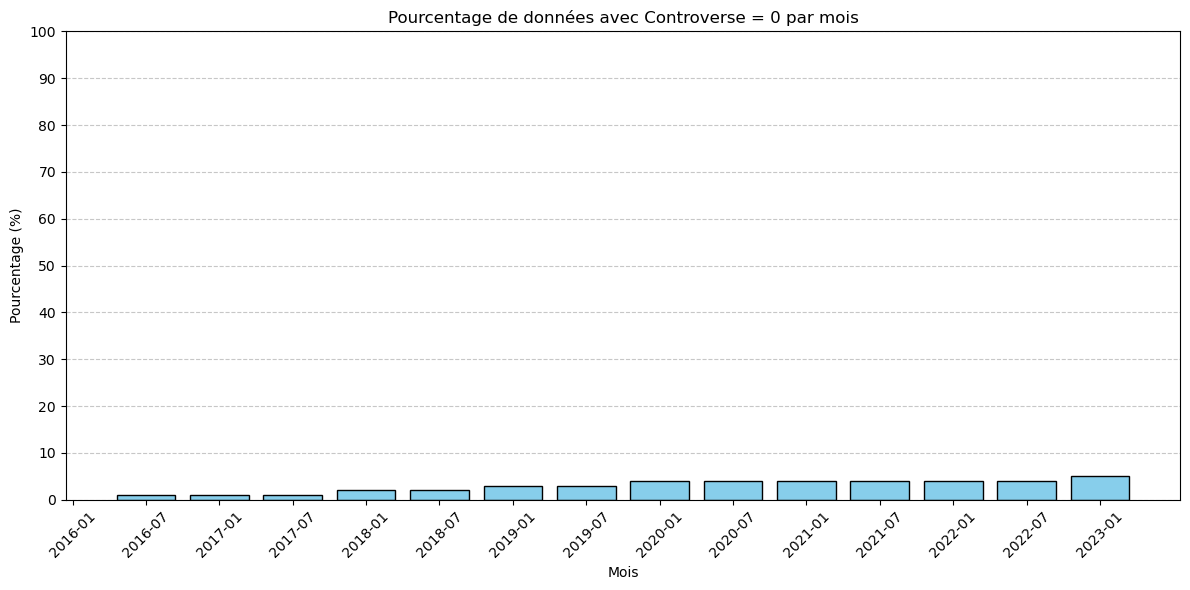

In [43]:
plot_percentage_per_month(filtered_df, 'Controverse')

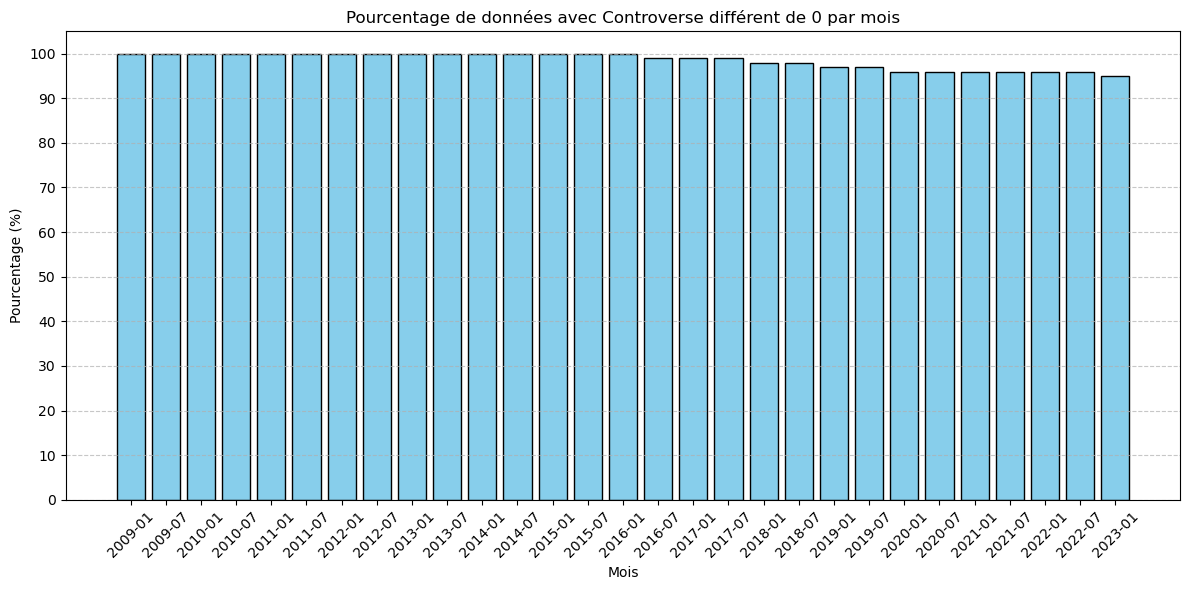

In [44]:
plot_nonzero_percentage_per_month(filtered_df, 'Controverse')

## ESG

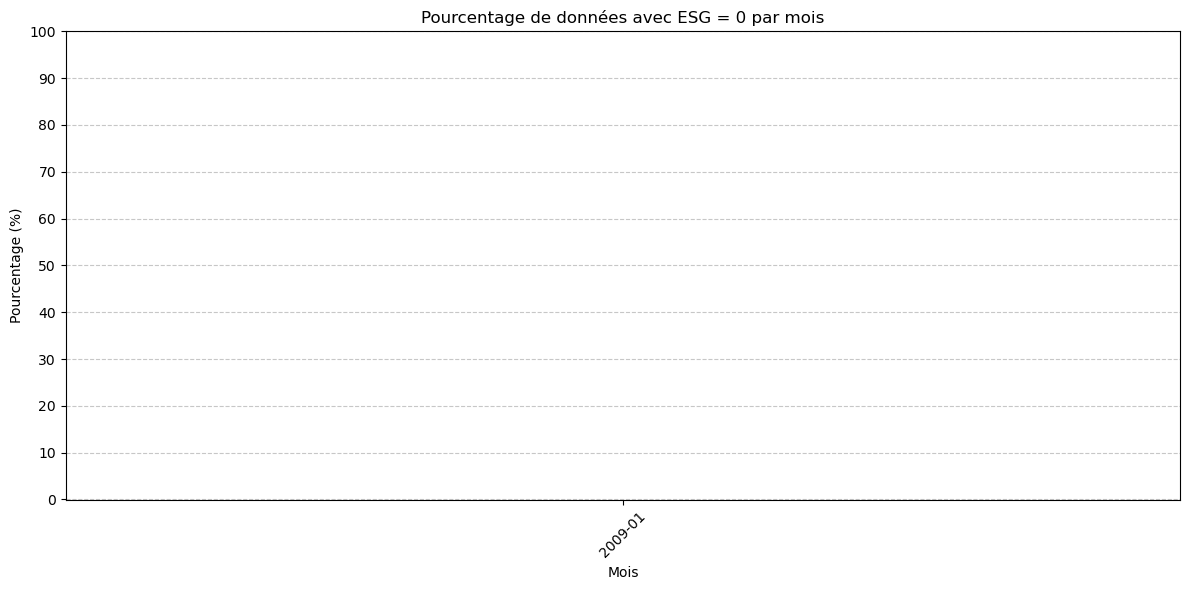

In [45]:
plot_percentage_per_month(filtered_df, 'ESG')

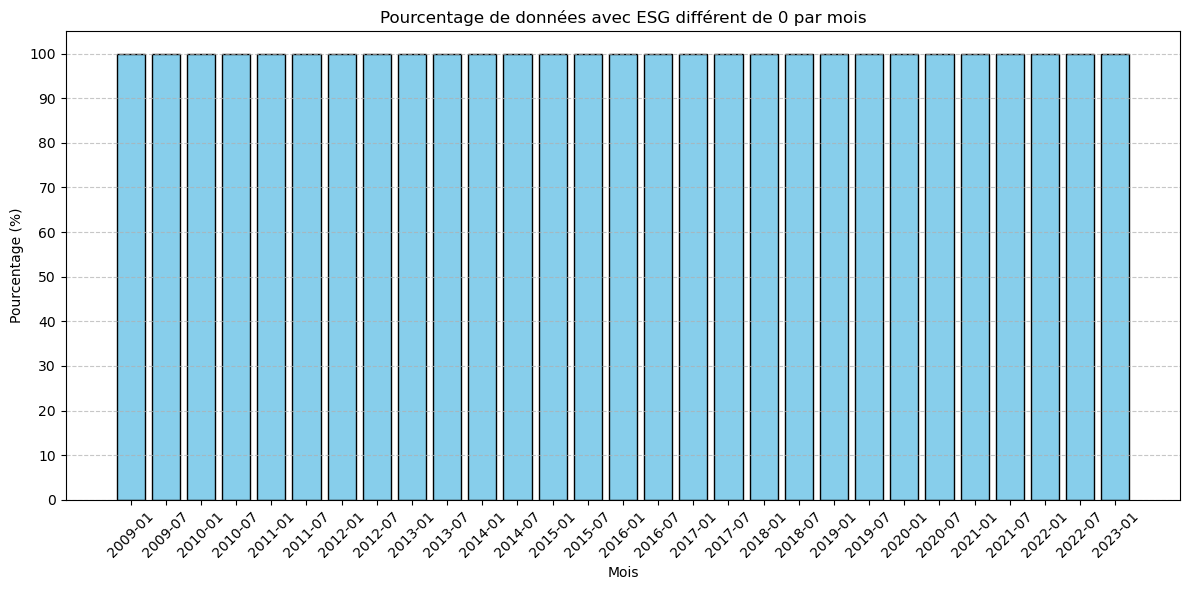

In [46]:
plot_nonzero_percentage_per_month(filtered_df, 'ESG')

## PFL

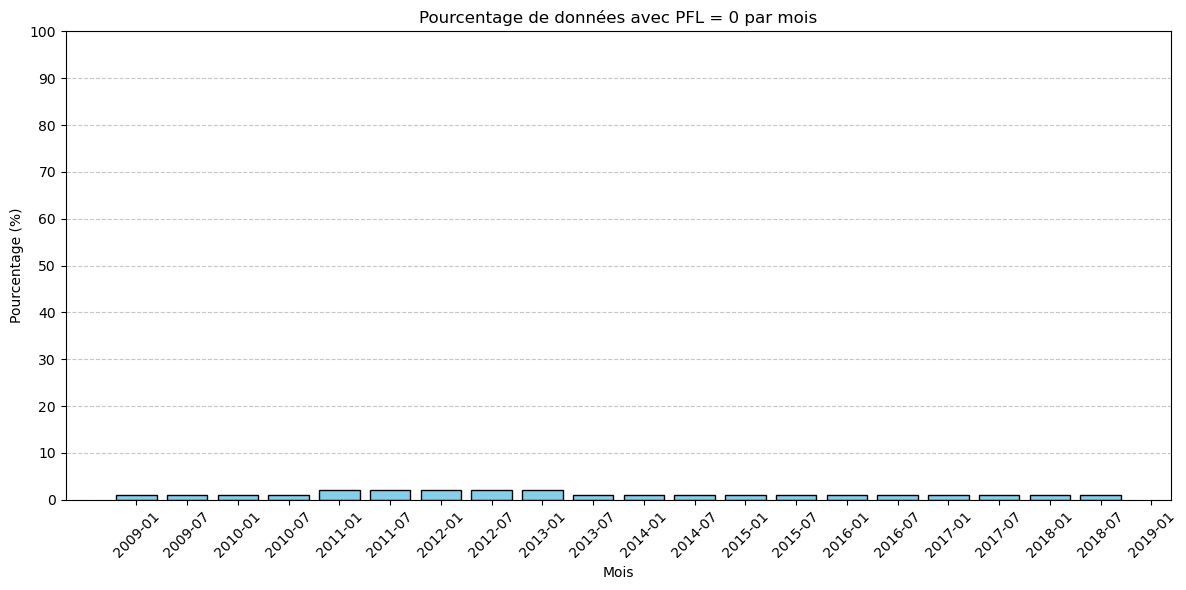

In [47]:
plot_percentage_per_month(filtered_df, 'PFL')

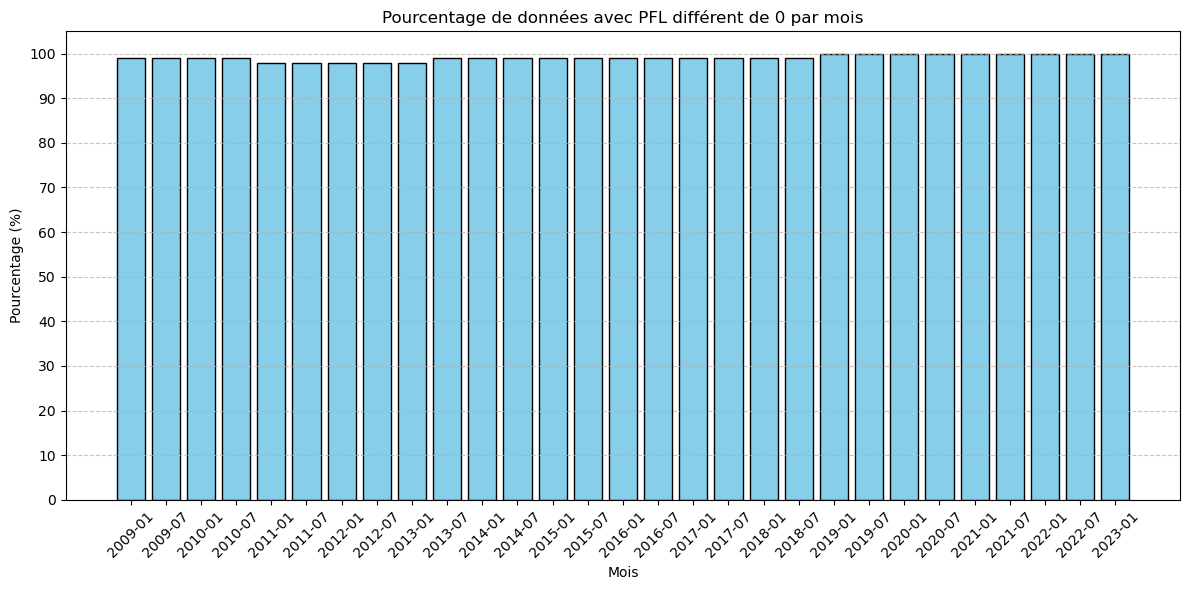

In [48]:
plot_nonzero_percentage_per_month(filtered_df, 'PFL')

## Diff_z

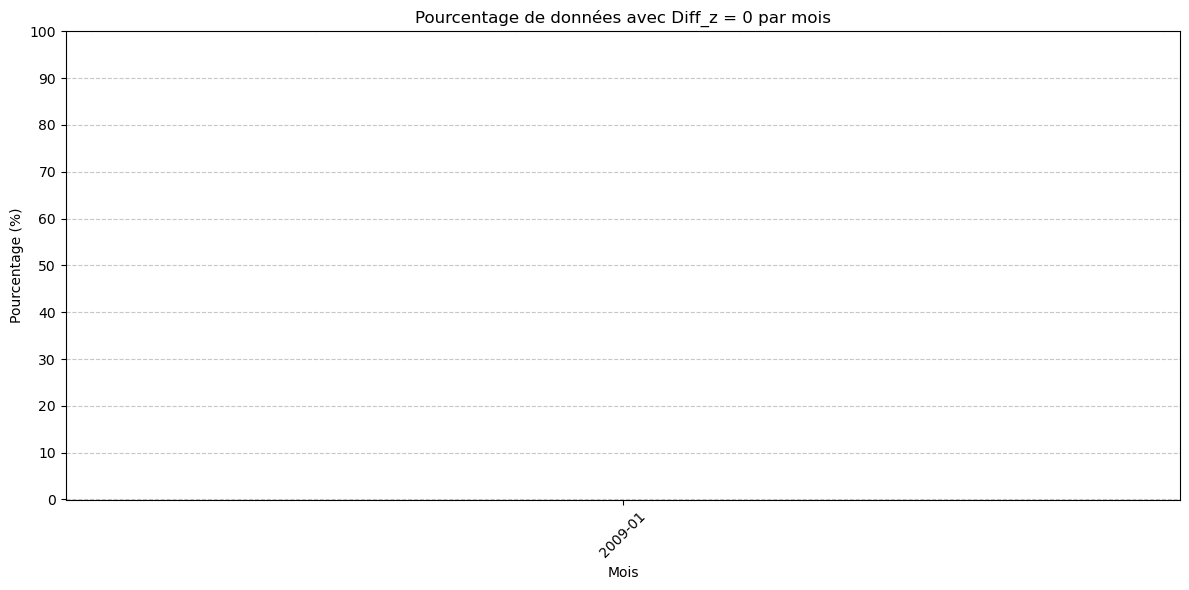

In [49]:
plot_percentage_per_month(filtered_df, 'Diff_z')

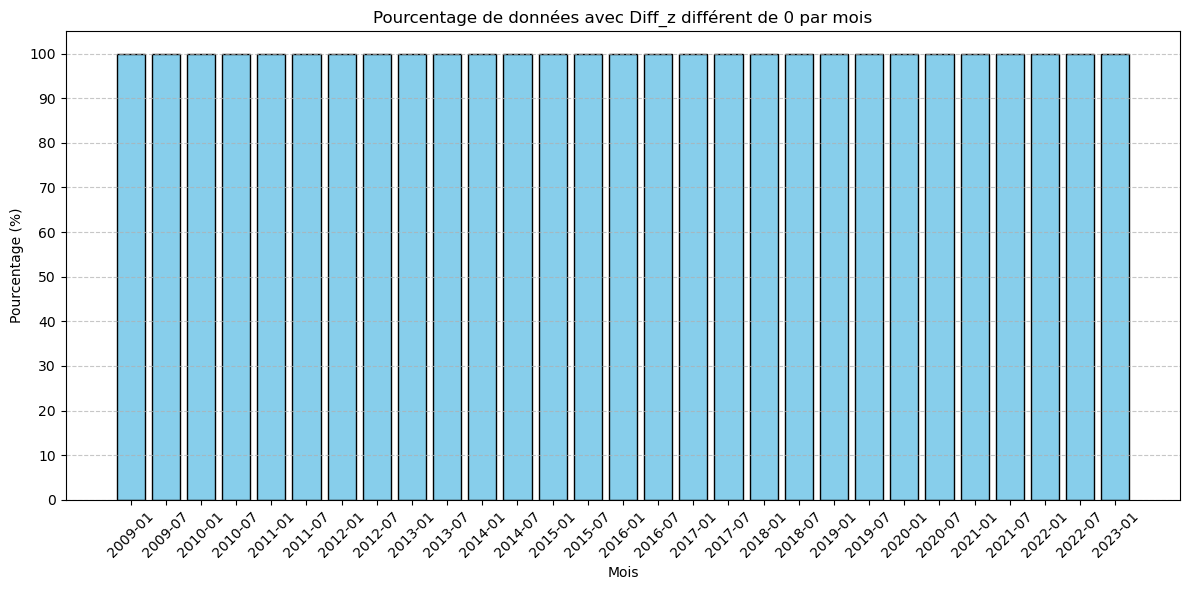

In [50]:
plot_nonzero_percentage_per_month(filtered_df, 'Diff_z')

# Exportation des données pour la partie économétrie

In [51]:
filtered_df.to_pickle('data_pannels.pkl')
filtered_df.to_csv('data_pannels.csv')